In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

# Perceptron class
<b>Parameters:</b>
    <li>eta :  float (Learning rate (0.0 < L < 0.1))
    <li>n_iter: int (passes over the training dataset)
    <li>random_state: int (Random seed generator for generating random weights)
    
<b>Attributes:</b>
    <li>w_ : 1-d Array (Weights after fitting)
    <li>errors_ : list (Number of missclassifications(updates))
    
<b>Functions:</b>

<code>1. fit()</code>
<br /> Parameters:<br />
    <li>X: (Array-like), shape = [n_samples, n_features] (training vectors)</li>
    <li>y: array-like, shape = [n_samples]</li>
<br /> Returns:<br />
    <li>self object</li>
    
<code>2. net_input() - calculate net input</code>
<br /> Parameters:<br />
    <li> Self
    <li> X: (Array-like), shape = [n_samples, n_features] (training vectors)
<br /> Returns:<br />
    <li>self object
    
<code>3. predict() - predicts the model</code>
<br /> Parameters:<br />
    <li> Self
    <li> X: (Array-like), shape = [n_samples, n_features] (training vectors)
<br /> Returns:<br />
    <li>self object

In [111]:
class Perceptron(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            return self
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict (self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [78]:
%matplotlib inline

### Load the datasets
<p>Segregate labels, features, label names and feature names</p>

In [43]:
dataset = datasets.load_iris()
features = pd.DataFrame((dataset.data))
label = pd.DataFrame(dataset.target)
feature_names = dataset.feature_names
target_names = dataset.target_names

In [76]:
X = features.iloc[0:100, [0, 2]].values
y = label.iloc[0:100, 0].values

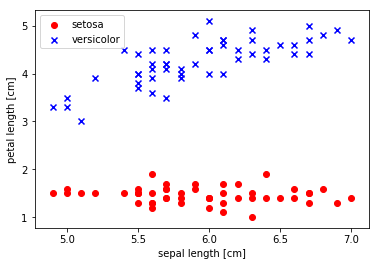

In [82]:
#Plotting setosa and versicolor
plt.scatter(X[50:100, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [87]:
#Model training
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)

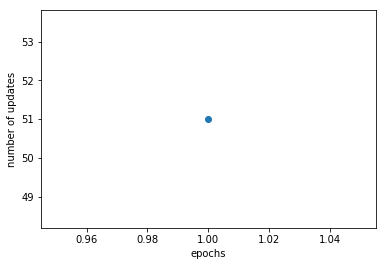

In [90]:
plt.plot(range(1, len(ppn.errors_) + 1),  ppn.errors_, marker = 'o')
plt.xlabel('epochs')
plt.ylabel('number of updates')
plt.show()

In [91]:
# Convenience function to visualize decision boundaries

def plot_decision_region(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColorMap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[ : 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[ : 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arrange(x1_min, x1_max, resolution), np.arrange(x1_m, x1_max, resolution))